# UNIVERSIDAD SANTIAGO DE CALI
## Facultad de Ingeniería
## Programa de Ingeniería Electrónica
### GUÍA PRÁCTICA DE LABORATORIO


Tema: Transformada Discreta de Fourier y Muestreo

Curso: Procesamiento digital de señales

Profesor: Milton Orlando Sarria P.

Correo Electrónico: milton.sarria00@usc.edu.co

### Objetivos:
1. Implementar un sistema para medir una variable
2. Profundizar en el estudio en frecuencia de una señal en tiempo discreto
2. Implementar rutinas básicas enfocadas en aplicaciones de DSP.

### Información Preliminar:
A través del análisis de Fourier se puede demostrar que cualquier señal está constituida por componentes sinusoidales de distintas frecuencias. Por tanto, se puede decir que para cada señal hay una función en el dominio del tiempo que determina la amplitud de la señal en cada instante de tiempo. De igual forma hay una función en el dominio de la frecuencia que especifica las frecuencias que conforman una señal.

Una señal puede tener muchas componentes de frecuencia. Se define el espectro de una señal como la representación del conjunto de ondas de diferente frecuencia que la constituyen en un grafico donde se pueden diferenciar
o agrupar por valores de frecuencia.

Se define como **ancho de banda absoluto** de una señal a todo el rango que ocupa ese espectro. No obstante, la mayor parte de la energía de la señal puede estar concentrada en una banda relativamente estrecha. Esta banda se denomina ancho de **banda efectivo** o simplemente ancho de banda.





# Procedimiento

## Implementar un sistema para medir una señal y visualizar el resultado

Usar la guía adjunta para implementar un sistema que permita digitalizar una medida tomada a partir de un sensor. La guía está planteada para un sensor de temperatura, pero pueden usar otro sensor por ejemplo humedad, luz,..... 
1. Usar un sistema como **Arduino** para la transmisión serial de señales digitales y principios de electrónica analoga para adecuar la señal. 

2. Mostrar en tiempo real el comportamiento de la señal usando Python.

**Nota** : Deben investigar cómo configurar el **Arduino** para poder tomar muestras a una tasa de muestreo deseada. Debe poder cambiar la tasa de muestreo. 

## Herramientas en Python
En python se puede usar el algoritmo de la transformada rápida de Fourier de la
siguiente forma:

In [1]:
import numpy as np
from scipy.fftpack import fftshift,  fft, ifft
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [19]:
### fft completa, parte positiva, parte negativa
def calFFT(x,nfft=512):
    X=fft(x,nfft)
    X=fftshift(X)
    absX = np.abs(X)/X.size
    pX = np.unwrap(np.angle(X))
    #agregar eps en lugar de ceros
    absX[absX < np.finfo(float).eps] = np.finfo(float).eps 
    Xdb = 20 * np.log10(absX) 
    return absX, pX

In [20]:
#################### FFT para señales reales, solo retorna la parte positiva del espectro 
import numpy as np
def calRFFT(x,nfft=512):
    X = np.fft.rfft(x,nfft)
    absX= np.abs(X)/(X.size)   
    #fase
    pX = np.unwrap(np.angle(X))
    #calcular la magnitud en dB, reemplazar ceros por epsilon para evitar desborde numerico
    absX[absX < np.finfo(float).eps] = np.finfo(float).eps 
    #retornar la magnitud en  y la fase
    return absX,pX


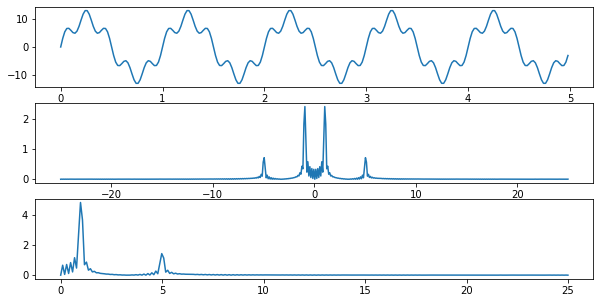

In [29]:
#ejemplo de uso
fs=50
d = 5
nfft=512
t=np.arange(0,d,1/fs);
#generar una onda de 1Hz
f1 = 1
x1=10*np.sin(2*np.pi*f1*t)
#generar una onda de 5Hz
f2 = 5
x2=3*np.sin(2*np.pi*f2*t)
#sumar las dos ondas
x= x1+x2

plt.figure(figsize=(10, 5))
plt.subplot(311)
plt.plot(t, x)
#calcular la fft 
X,_ = calFFT(x,nfft)
f = np.linspace(-1,1,X.size)*fs/2
plt.subplot(312)
plt.plot(f, X)

#calcular la fft 
X,_=calRFFT(x,nfft)
f = np.linspace(0,1,X.size)*fs/2


plt.subplot(313)
plt.plot(f, X)

Adicionalmente se hará uso de las funciones de lectura y escritura de archivos de audio en formato wav de la siguiente forma. Recordar que los archivos destino y fuente deben ser modificados según las necesidades particulares.

In [4]:
from wav_rw import wavread,wavwrite

#lectura
file_name = 'GuitarSound/guitar1.wav'
fs,x = wavread(file_name)

#escritura
file_name ='copy_sound.wav'
wavwrite(x,fs,file_name)

audio en estereo: tomar solo el canal 1
(172617,)


###  Procedimiento:
1. Generar un tono sinusoidal de 480 Hz, 2 segundos de duración, 0.8 de amplitud y guardarlo en un archivo con nombre punto1_480.wav (Usar 16kHz de frecuencia de muestreo).
2. Generar una señal compuesta de la suma de dos ondas sinusoidales 440 Hz y 620 Hz, respectivamente, 2 segundos de duración, 0.8 de amplitud cada una. Guardar el resultado en un archivo con nombre punto2_440_620.wav (Usar 16kHz de frecuencia de muestreo).
3. Cargar los archivos guardados en el punto 1 y 2 y Visualizar la magnitud de la transformada de Fourier de cada uno. Es necesario asegurar que el eje de la frecuencia tenga la escala adecuada, se debe usar la siguiente escala para el eje horizontal. Usar la función que permite leer archivos de audio descrita anteriormente.


```python
F=np.linspace(-fs/2,fs/2,X.size)
``` 

Donde **X** representa la transformada de Fourier de una señal **x**, donde **fs** es la frecuencia de muestreo. Si se usa la FFT para señales reales, tener en cuenta que el rango se modifica y va de **0 a fs/2**

4. Usar la librería sicpy para generar una onda cuadrada de 1kHz y una onda tipo diente de sierra de 1kHz, cada señal debe tener una amplitud de 3. Visualizar la magnitud de la transformada de Fourier de las dos señales y comparar el ancho de banda de los dos tipos de señales. Que diferencias hay? Incrementar la frecuencia de las señales a 3kHz y comparar de nuevo

In [3]:
from scipy import signal
fs=16000
duracion = 1
t=np.arange(1,duracion,1/fs)
#definir la frecuencia angular y amplitud
w=2*np.pi*5
Vm=10
x1=Vm*np.square(w*t) #senal cuadrada
x2=Vm*signal.sawtooth(w*t) #senal diente de sierra

5. Usar los archivos adjuntos en la practica:
    - guitar1.wav
    - guitar2.wav
    - guitar3.wav

Cargar y visualizar una pequeña porcion de cada onda. 
Cual es la frecuencia de muestreo para cada caso? Cual es la duración en segundos? 



6. Consultar el cálculo de energía para una señal tanto en el dominio del tiempo como en frecuencia. Consultar sobre el teorema de Parseval. 

Calcular la energía de cada archivo tanto en el dominio de la frecuencia como en el dominio del tiempo y comparar.

7. Estimar el ancho de banda de las señales anteriormente analizadas considerando que las componentes de frecuencia que se pueden despreciar son aquellas con energía menor a 40 dB medidos desde el valor máximo de la magnitud de la transformada de Fourier (en dB) para una señal en particular.

8. Cambiar (reducir) la frecuencia de muestreo de tal forma que se pueda cubrir como mínimo dos veces el ancho de banda estimado en el punto anterior y remuestrear las señales de audio para guardarlas con una nueva frecuencia de muestreo. En el siguiente ejemplo se define una nueva frecuencia de muestreo de 2kHz y se genera una nueva secuencia usando dicha tasa de muestreo.

9. Repetir los punto 5 para los sonidos que se encuentran en la carpeta **vowels**